In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import matplotlib
import matplotlib.pyplot as plt

df_raw = pd.read_csv("Titanic.csv", engine="python", encoding="CP949")

df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. 데이터 속성 및 기술통계량 확인

### 변수 설명
- PassengerId : 승객 번호
- Survived : 생존 여부 (0 = 사망, 1 = 생존)
- Pclass : 승객 등급 (1, 2, 3)
- Name : 이름
- Sex : 성별 (male, female)
- Age : 나이
- SibSp : 형제, 배우자 수
- Parch : 자녀, 부모 수
- Ticket : 티켓 아이디
- Fare : 티켓 요금
- Cabin : 객실 번호
- Embarked : 승객이 탑승한 곳 (C(Cherbourg), Q(Queenstown), S(Southampton))

In [203]:
df_raw.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


### 결측치 확인
#### Cabin 과 Embarked에 결측치가 존재

In [204]:
df_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 결측치 처리
#### Embarked의 경우 가장 빈번한 값(최빈값)을 넣는다.

In [205]:
df_raw.groupby("Embarked").count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168,69
Q,77,77,77,77,77,77,77,77,77,77,4
S,644,644,644,644,644,644,644,644,644,644,129


### Embarked의 값들 C, Q, S 중에서 가장 빈번하게 나오는 S로 결측치들을 채운다. Southhampton에서 출발한 경우가 나머지 C, Q 에서 출발한 경우보다 월등하게 많으므로 결측치 2개를 S로 채우는 것이 전체 데이터에 큰 영향을 주지 않는다고 생각했다.

In [206]:
df_raw["Embarked"].fillna("S", inplace=True)
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [207]:
df_raw["Cabin"].isna().mean()

0.7710437710437711

### N/A인 Cabin 값이 전체의 약 77%에 해당하므로 해당 Column이 의미 있는 값을 가지고 있다고 생각하기 힘들다고 생각했다.

### 따라서 N/A를 가지는 Cabin 열을 제거했다.

In [208]:
df_raw.drop(['Cabin'], axis='columns', inplace=True)
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## 이상치 확인
### Box plot을 이용해 이상치를 확인한다.

<AxesSubplot:>

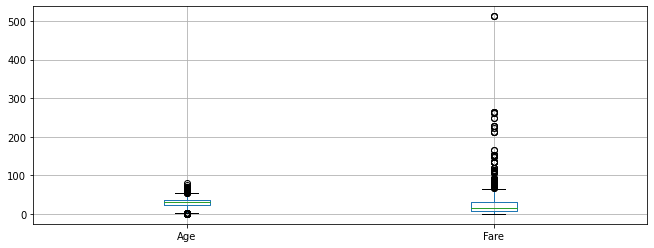

In [209]:
df_raw.select_dtypes(include='float').boxplot(figsize=(11, 4))

## Fare와 Age에서 이상치가 발견된다.  특히 Fare는 이상치가 두드러진다는 것을 알 수 있다.

### Boxplot 을 그려본 결과 fare 변수에서 일반적인 값들과 동떨어지는 다수의 데이터를 발견했다.

In [210]:
df_titanic = df_raw[df_raw["Fare"] < 100]
df_titanic = df_titanic[df_titanic["Age"] < 80]
df_titanic.reset_index(drop = True, inplace = True)
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
832,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
833,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
834,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S
835,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### 이상치를 제외한 정제된 df_titanic 데이터를 추출한다

### 숫자형 변수 선택

In [211]:
df_titanic_num = df_titanic.select_dtypes(exclude="object")
df_titanic_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


### 문자형 변수 선택

In [212]:
df_titanic_char = df_titanic.select_dtypes(include="object")
df_titanic_char.head()

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


### 데이터 통계량 요약

In [213]:
df_scale_std = scale(df_titanic_num)

df_scale_std = pd.DataFrame(df_scale_std, columns=df_titanic_num.columns)
df_scale_std.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,-1.708394,-0.751323,0.767305,-0.590227,0.434102,-0.44652,-0.727609
1,-1.704547,1.330986,-1.761177,0.657053,0.434102,-0.44652,2.347136
2,-1.700699,1.330986,0.767305,-0.278407,-0.460833,-0.44652,-0.695197
3,-1.696852,1.330986,-1.761177,0.423188,0.434102,-0.44652,1.474012
4,-1.693004,-0.751323,0.767305,0.423188,-0.460833,-0.44652,-0.689195


### 평균 = 0, 표준편차 = 1기준으로 변환

In [214]:
df_scale_desc = df_scale_std.describe()
df_scale_desc.round(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,837.000,837.000,837.000,837.000,837.000,837.000,837.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-1.708,-0.751,-1.761,-2.272,-0.461,-0.447,-1.076
25%,-0.885,-0.751,-0.497,-0.590,-0.461,-0.447,-0.697
50%,0.011,-0.751,0.767,0.033,-0.461,-0.447,-0.452
75%,0.862,1.331,0.767,0.423,0.434,-0.447,0.255
max,1.716,1.331,0.767,3.463,6.699,7.207,3.414


In [215]:
df_scale_desc = df_scale_robust.describe()
df_scale_desc.round(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,888.000,888.000,888.000,888.000,888.000,888.000,888.000
mean,0.000,0.382,-0.687,-0.020,0.525,0.382,0.705
std,0.579,0.486,0.834,1.002,1.104,0.807,1.800
min,-1.000,0.000,-2.000,-2.275,0.000,0.000,-0.632
25%,-0.501,0.000,-1.000,-0.615,0.000,0.000,-0.287
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.499,1.000,0.000,0.385,1.000,0.000,0.713
max,1.002,1.000,0.000,3.846,8.000,6.000,10.865


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

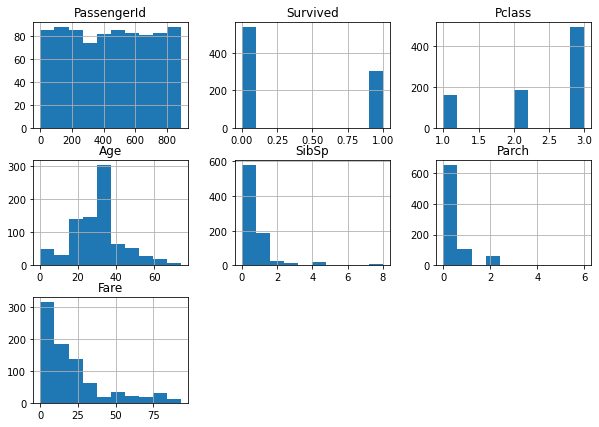

In [216]:
df_titanic.hist(figsize = (10, 7))

array([[<AxesSubplot:title={'center':'Raw'}>,
        <AxesSubplot:title={'center':'Standard'}>],
       [<AxesSubplot:title={'center':'MinMax'}>,
        <AxesSubplot:title={'center':'Robust'}>]], dtype=object)

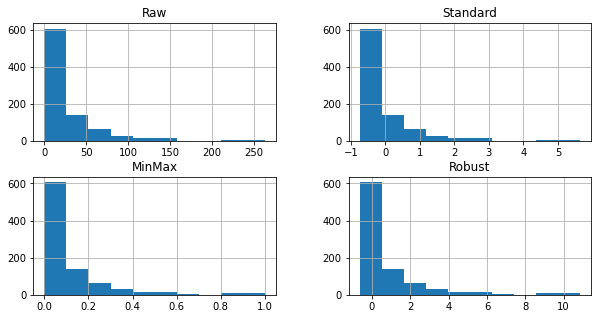

In [217]:
df_fare[["Raw", "Standard", "MinMax", "Robust"]].hist(figsize = (10, 5))

## 승객의 성별과 생존 여부 상관성

<AxesSubplot:xlabel='Sex,Survived'>

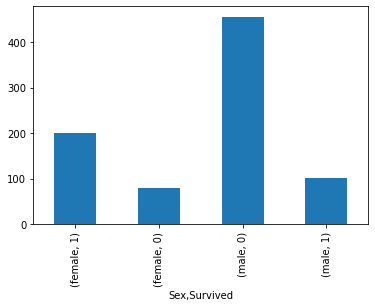

In [218]:
df_count = df_titanic.groupby("Sex")["Survived"].value_counts()
df_count.plot.bar()

## 성별에 따른 생존율 차이가 존재함을 알 수 있다.

### 여성의 경우 생존자가 사망자보다 많지만
### 남성의 경우 사망자가 생존자보다 훨씬 많다는 것을 확인할 수 있다.

## 출발 항구와 생존 여부 상관성

<AxesSubplot:xlabel='Embarked,Survived'>

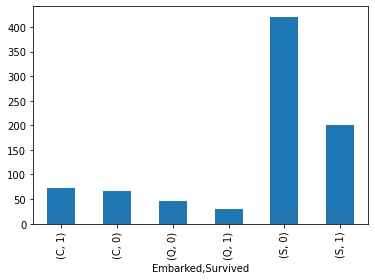

In [219]:
df_count = df_titanic.groupby("Embarked")["Survived"].value_counts()
df_count.plot.bar()

### 표를 보면 Southhampton에서 출발한 사람들의 사망률이 높아보인다.
### 그러나 애초에 Southhampton에서 출발한 사람의 수가 다른 항구에 비해 훨씬 많다는 것을 위의 통계량을 통해 알 수 있다.

### 하지만 다른 항구에 비해 생존한 사람과 사망한 사람의 비율이 높다는 것을 알 수 있따.

## 승객 등급에 따른 생존률

<AxesSubplot:xlabel='Pclass,Survived'>

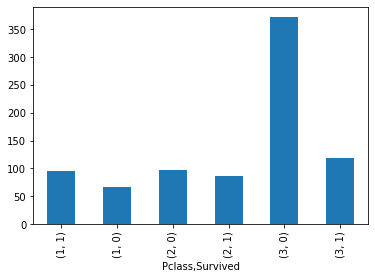

In [220]:
df_count = df_titanic.groupby("Pclass")["Survived"].value_counts()
df_count.plot.bar()

### 1등급과 2등급의 승객들은 크게 등급에 따른 생존 여부 차이가 존재하지 않는다.

### 그러나 3등급의 승객들은 사망한 사람이 생존한 사람의 비해 월등하게 높다는 것을 알 수 있다.

## 형제, 배우자 수 또는 자녀, 부모의 수에 따라 각각 생존 여부를 보았을 때 유사하다는 특징이 있었다.

<AxesSubplot:xlabel='SibSp,Survived'>

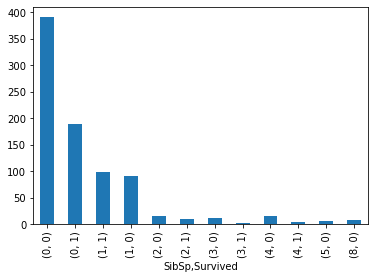

In [221]:
df_count = df_titanic.groupby("SibSp")["Survived"].value_counts()
df_count.plot.bar()

<AxesSubplot:xlabel='Parch,Survived'>

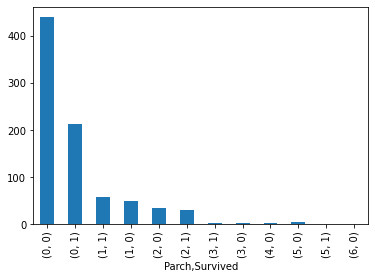

In [222]:
df_count = df_titanic.groupby("Parch")["Survived"].value_counts()
df_count.plot.bar()

In [223]:
df_titanic["Age"].mean()

29.571385902031064

### 승객들의 나이의 평균은 약 29살이다.

### 형제, 자매가 많으면 많을 수록
### 함께 간 자녀, 부모의 수가 많을 수록 사망률을 급격하게 감소했다.

### Age의 산술평균을 구해보면 약 29세로 평균적으로 매우 젊은 승객들이 많았다는 것을 알 수 있다.

# 결론 : 승객들의 개인적인 정보들이 사고가 났을 때 생존에 영향을 끼친다는 것을 확인할 수 있었다.